In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [2]:
Charge_hourly = pd.read_csv(r'./charge_hourly.csv')

In [3]:
Charge_hourly

,Time,Energy_kWh,weekday,hour,hols
0,2020-12-02 09:00:00,4.213925,2,9,NaN
1,2020-12-02 10:00:00,0.546100,2,10,NaN
2,2020-12-02 11:00:00,-0.008600,2,11,NaN
3,2020-12-02 12:00:00,-0.008500,2,12,NaN
4,2020-12-02 13:00:00,0.005967,2,13,NaN
...,...,...,...,...,...
10030,2022-01-31 21:00:00,0.000000,0,21,NaN
10031,2022-01-31 22:00:00,0.000000,0,22,NaN
10032,2022-01-31 23:00:00,0.000000,0,23,NaN
10033,2022-02-01 00:00:00,0.000000,1,0,NaN


In [4]:
Charge_hourly['Time'] = pd.to_datetime(Charge_hourly['Time'])

In [5]:
Charge_hourly['is_hol'] = ~Charge_hourly.isna()['hols']

In [6]:
Charge_hourly.set_index(['Time'], inplace=True)

In [7]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol
Time,,,,,
2020-12-02 09:00:00,4.213925,2,9,NaN,False
2020-12-02 10:00:00,0.546100,2,10,NaN,False
2020-12-02 11:00:00,-0.008600,2,11,NaN,False
2020-12-02 12:00:00,-0.008500,2,12,NaN,False
2020-12-02 13:00:00,0.005967,2,13,NaN,False
...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,NaN,False
2022-01-31 22:00:00,0.000000,0,22,NaN,False
2022-01-31 23:00:00,0.000000,0,23,NaN,False


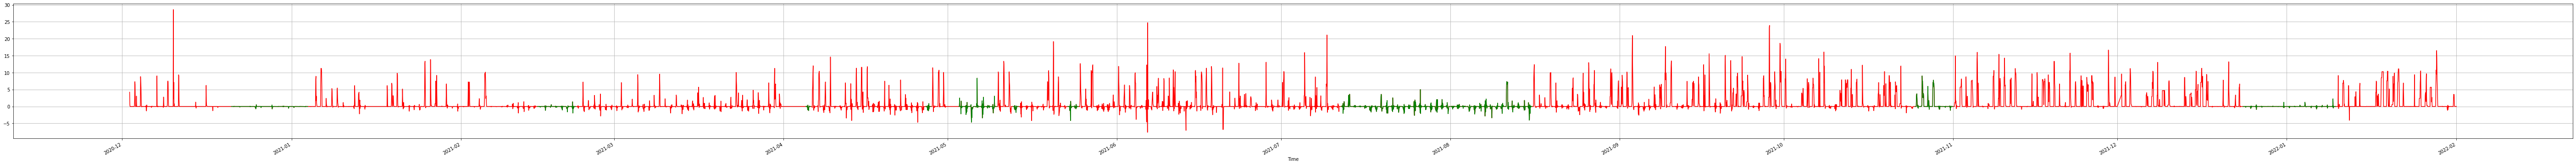

In [8]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [9]:
R_value = pd.read_json(r'./Rvalue.json', orient='split')

In [10]:
R_value

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,3
1,2020-02-18,0.00,1.74,4.00,hosp,3
2,2020-02-19,0.50,1.59,2.83,hosp,3
3,2020-02-20,0.83,1.74,2.83,hosp,3
4,2020-02-21,0.67,2.03,3.67,hosp,3
...,...,...,...,...,...,...
748,2022-03-06,0.99,NaN,1.01,testpos,3
749,2022-03-07,0.96,NaN,0.98,testpos,3
750,2022-03-08,0.94,NaN,0.96,testpos,3
751,2022-03-09,0.92,NaN,0.94,testpos,3


In [11]:
R_value.loc[R_value.Rt_avg.isna(), 'Rt_avg'] = (R_value.loc[R_value.Rt_avg.isna(), 'Rt_low'] + R_value.loc[R_value.Rt_avg.isna(), 'Rt_up'])/2

In [12]:
R_value.set_index(['Date'], inplace=True)

In [13]:
Charge_hourly['R'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'R'] = R_value.loc[str(Charge_hourly.index.date[i]),'Rt_avg']

In [14]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,R
Time,,,,,,
2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21
2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21
2020-12-02 11:00:00,-0.008600,2,11,NaN,False,1.21
2020-12-02 12:00:00,-0.008500,2,12,NaN,False,1.21
2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21
...,...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96
2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96
2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96


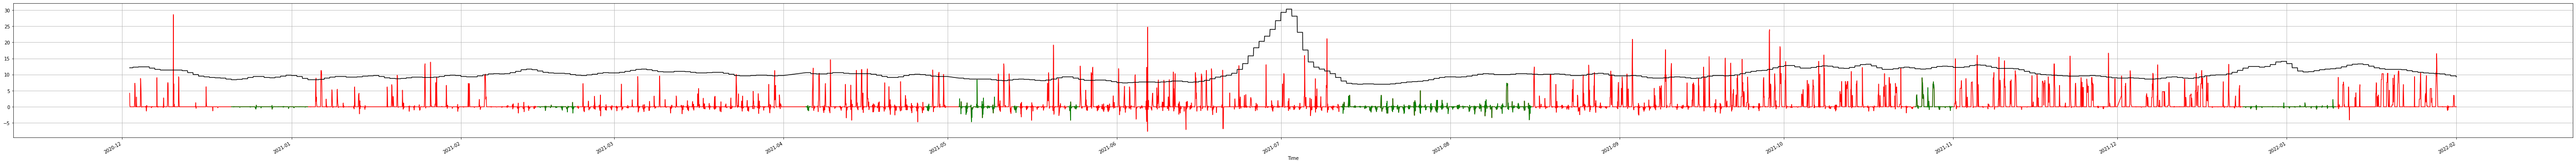

In [15]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['R']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [16]:
ic = pd.read_csv(r'./COVID-19_ic_opnames.csv', sep=';')

In [17]:
ic

,Version,Date_of_report,Date_of_statistics,IC_admission_notification,IC_admission
0,1,2022-03-14 00:30:00,2020-02-27,0,0
1,1,2022-03-14 00:30:00,2020-02-28,0,0
2,1,2022-03-14 00:30:00,2020-02-29,0,1
3,1,2022-03-14 00:30:00,2020-03-01,0,1
4,1,2022-03-14 00:30:00,2020-03-02,0,0
...,...,...,...,...,...
741,1,2022-03-14 00:30:00,2022-03-09,14,15
742,1,2022-03-14 00:30:00,2022-03-10,11,11
743,1,2022-03-14 00:30:00,2022-03-11,19,11
744,1,2022-03-14 00:30:00,2022-03-12,8,6


In [18]:
ic['Date_of_statistics'] = pd.to_datetime(ic['Date_of_statistics'])

In [19]:
ic.set_index(['Date_of_statistics'], inplace=True)

In [ ]:
Charge_hourly['IC_number'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'IC_number'] = ic.loc[str(Charge_hourly.index.date[i]),'IC_admission']

In [ ]:
Charge_hourly

In [ ]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = Charge_hourly['IC_number'].plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

# Covid measures in the Netherlands
Source:

https://www.simmons-simmons.com/en/publications/ckk2f4e4e17ch0933ifsradrd/covid-19-netherlands-lockdown-measures-extended

https://www.government.nl/latest/news/2021/03/23/coronavirus-measures-will-be-extended

https://www.government.nl/latest/news/2021/04/20/step-1-shops-and-outdoor-seating-at-restaurants-and-cafes-will-partially-reopen-evening-curfew-lifted

https://www.government.nl/latest/news/2021/05/11/step-2-indoor-sports-facilities-to-reopen-and-more-scope-for-activities-outdoors

https://www.government.nl/latest/news/2021/05/28/step-3-nearly-everything-to-reopen-subject-to-certain-conditions
## 19 November to 28 April
Hard lockdown: only 2 guests max, all gyms, offline classes were closed. Only super markets, pharmacies were opened.
## 21 January
New UK varient, curfew from 20:30 to 04:30 was introduced.
## 28 April
Curfew was lifted. In-person classes once a week
## 19 May
Leisure and sport activities were allowed
## 05 June
Increase max number of people in a room. Internal teams of company were allowed to meet again.
## 21 June
Employee can work up to half of their hours in the office. Events were allowed.
## 15 July
Work at home unless there is no other way.
## 30 August
On-site learning at univesities was permitted.
## 28 November to 25 January
Schools were still opened. No social activities after 17:00. Shops closed after 20:00
## 20 December to 14 January
School acrtivities remained like before, cinemas, theaters, museums were closed
## 26 January
Shops were open until 22:00

Column "measure" describe how strict the measures were. The complete lockdown has the value 1, partly open of schools has the value 0.75, open of school with strict measures (early close of shops, social activities,...) has the value of 0.5, and open of school with relaxed measures has the value of 0.25.

Distribution of values:

19/11/2020 to 27/04/2021: value 1

28/04/2021 to 04/06/2021: value 0.75

05/06/2021 to 14/07/2021: value 0.5

15/07/2021 to 30/08/2021: value 0.75

01/09/2021 to 25/01/2022: value 0.5

after 25/01/2022: value 0.25

In [ ]:
Charge_hourly['measure'] = np.NaN
Charge_hourly.loc[Charge_hourly.index < '2021-04-28', 'measure'] = 1
Charge_hourly.loc[(Charge_hourly.index < '2021-06-05') & (Charge_hourly.index > '2021-04-27'),'measure'] = 0.75
Charge_hourly.loc[(Charge_hourly.index < '2021-07-15') & (Charge_hourly.index > '2021-06-04'),'measure'] = 0.5
Charge_hourly.loc[(Charge_hourly.index < '2021-09-01') & (Charge_hourly.index > '2021-07-14'),'measure'] = 0.75
Charge_hourly.loc[(Charge_hourly.index < '2022-01-26') & (Charge_hourly.index > '2021-08-31'),'measure'] = 0.5
Charge_hourly.loc[(Charge_hourly.index > '2022-01-25'),'measure'] = 0.25

In [ ]:
Charge_hourly

In [ ]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['measure']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [ ]:
X = Charge_hourly.iloc[:,[1,2,4,5,6,7]].values
y = Charge_hourly.iloc[:, 0].values

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)

In [ ]:
X_poly.shape

In [ ]:
X.shape

In [ ]:
Charge_hourly.index

In [ ]:
plt.pyplot.figure(figsize=(200,6))
plt.pyplot.plot(Charge_hourly.index,y,'r',Charge_hourly.index,pol_reg.predict(X_poly),'b')
plt.pyplot.show()

# Validate

In [ ]:
Grid0322 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030122.csv')
PV0322 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030122.csv')

In [ ]:
def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    data_out['Timediff'] = data_out.diff()['Time']
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    data_out.drop([0], axis=0, inplace=True)
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data

In [ ]:
Grid0322_hourly = extract_data(Grid0322)
PV0322_hourly = extract_data(PV0322)

In [ ]:
Grid0322_hourly

In [ ]:
PV0322_hourly

In [ ]:
Charge0322_hourly = Grid0322_hourly[['Energy_kWh']].copy()
Charge0322_hourly['Energy_kWh'] = PV0322_hourly['Energy_kWh'] - Grid0322_hourly['Energy_kWh']

In [ ]:
Charge0322_hourly['weekday']=Charge0322_hourly.index.day_of_week
Charge0322_hourly['hour']=Charge0322_hourly.index.hour

In [ ]:
Charge0322_hourly

In [ ]:
Charge0322_hourly['hols'] = np.NaN
Charge0322_hourly.loc[(Charge0322_hourly.index > '2022-02-27 23:00:00') & (Charge0322_hourly.index < '2022-03-07 00:00:00'), 'hols'] = 'Spring holiday'

In [ ]:
Charge0322_hourly['is_hol'] = ~Charge0322_hourly.isna()['hols']

In [ ]:
Charge0322_hourly

In [ ]:
Charge0322_hourly['R'] = np.NaN
for i in range(len(Charge0322_hourly)):
    Charge0322_hourly.loc[str(Charge0322_hourly.index.date[i]), 'R'] = R_value.loc[str(Charge0322_hourly.index.date[i]),'Rt_avg']
    
Charge0322_hourly['IC_number'] = np.NaN
for i in range(len(Charge0322_hourly)):
    Charge0322_hourly.loc[str(Charge0322_hourly.index.date[i]), 'IC_number'] = ic.loc[str(Charge0322_hourly.index.date[i]),'IC_admission']
    
Charge0322_hourly['measure'] = 0.25

In [ ]:
Charge0322_hourly

In [ ]:
Charge0322_hourly = Charge0322_hourly.iloc[:668,:]
Charge0322_hourly

In [ ]:
X_val = Charge0322_hourly.iloc[:,[1,2,4,5,6,7]].values
y_val = Charge0322_hourly.iloc[:, 0].values

In [ ]:
X_val_poly = poly.fit_transform(X_val)

In [ ]:
plt.pyplot.figure(figsize=(100,6))
plt.pyplot.plot(Charge0322_hourly.index,y_val,'r',Charge0322_hourly.index,pol_reg.predict(X_val_poly),'b')
plt.pyplot.show()